### Libraries

In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

### Reading Dataset

In [3]:
def init_ds(json_data):
    # This function initializes an empty dictionary and a list of keys
    # based on the keys in the input JSON data
    dataset = {}
    keys = json_data.keys()
    for key in keys:
        dataset[key] = []
    return dataset, keys

def read_json(file):
    # This function reads a JSON file line by line and appends the values
    # to a dictionary with keys based on the first line of the file.
    dataset = {}
    keys = []
    with open(file, encoding='utf-8') as file_lines:
        for count, line in enumerate(file_lines):
            # Load the JSON data from each line
            data = json.loads(line.strip())
            if count == 0:
                # Initialize the dataset dictionary and keys list
                dataset, keys = init_ds(data)
            # Append each value to its corresponding key in the dataset dictionary
            for key in keys:
                dataset[key].append(data[key])
        # Convert the dataset dictionary to a pandas DataFrame and return it
        return pd.DataFrame(dataset)

For my analysis, I decided to focus on Yelp reviews and business datasets. These datasets contain information about the reviews that users have left for businesses as well as information about the businesses themselves, such as their names, addresses, and categories. By using these two datasets, I was able to gain insights into the performance of businesses, the sentiments of their customers, and how these factors relate to each other. Additionally, these datasets are large and comprehensive, containing millions of records, which allows for in-depth analyses and meaningful conclusions.

In [4]:
yelp_review= read_json('./yelp_datasets/yelp_academic_dataset_review.json')

In [5]:
yelp_business= read_json('./yelp_datasets/yelp_academic_dataset_business.json')

In [6]:
yelp_review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [10]:
yelp_review.to_csv('yelp_review.csv')

In [14]:
yelp_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
yelp_business.to_csv('yelp_business.csv')

In [9]:
yelp_business.describe()

,latitude,longitude,stars,review_count,is_open
count,150346.000000,150346.000000,150346.000000,150346.000000,150346.00000
mean,36.671150,-89.357339,3.596724,44.866561,0.79615
std,5.872759,14.918502,0.974421,121.120136,0.40286
min,27.555127,-120.095137,1.000000,5.000000,0.00000
25%,32.187293,-90.357810,3.000000,8.000000,1.00000
50%,38.777413,-86.121179,3.500000,15.000000,1.00000
75%,39.954036,-75.421542,4.500000,37.000000,1.00000
max,53.679197,-73.200457,5.000000,7568.000000,1.00000


In [10]:
yelp_review.describe()

,stars,useful,funny,cool
count,6.990280e+06,6.990280e+06,6.990280e+06,6.990280e+06
mean,3.748584e+00,1.184609e+00,3.265596e-01,4.986175e-01
std,1.478705e+00,3.253767e+00,1.688729e+00,2.172460e+00
min,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,5.000000e+00,1.182000e+03,7.920000e+02,4.040000e+02


### An overview of the reviews

In [11]:
useful_reviews = len(yelp_review[yelp_review["useful"]>0])
cool_reviews = len(yelp_review[yelp_review["cool"]>0])
funny_reviews = len(yelp_review[yelp_review["funny"]>0])
negative_reviws = len(yelp_review[yelp_review["stars"]<2])
positive_reviews =len(yelp_review[yelp_review["stars"]>3])
total_reviews = len(yelp_review)

print("Total reviews: {}".format(total_reviews))
print("Useful reviews: {}".format(useful_reviews))
print("Funny reviews: {}".format(funny_reviews))
print("Cool reviews: {}".format(cool_reviews))
print("Total negative reviews: {}".format(negative_reviws))
print("Total positive reviews: {}".format(positive_reviews))

Total reviews: 6990280
Useful reviews: 3149784
Funny reviews: 1096161
Cool reviews: 1612315
Total negative reviews: 1069561
Total positive reviews: 4684545


### Top reviewed business

In [12]:
#Filter out reviews with ratings less than or equal to 3 from yelp_review DataFrame
top_reviewed = yelp_review[yelp_review["stars"]>3]

#Create an empty dictionary to store business ids as keys and the number of times they are reviewed as values
top_reviews_dict = {}

#Iterate over the business ids in top_reviewed DataFrame
for business_id in top_reviewed["business_id"].values:
    try :
        # Increment the value of the key if it already exists in the dictionary
        top_reviews_dict[business_id] = top_reviews_dict[business_id]+1
    except:
        # Add the key to the dictionary with value 1 if it does not exist
        top_reviews_dict[business_id] = 1

#Convert the dictionary into a DataFrame with business ids as index
topbusiness = pd.DataFrame.from_dict(data= top_reviews_dict,orient = "index")

#Reset the index to add a column for business ids
topbusiness.reset_index(inplace = True)

#Rename the columns to 'business_id' and 'rated'
topbusiness.columns = ['business_id', 'rated']

#Remove the dictionary and DataFrame objects from the memory
del(top_reviews_dict)
del(top_reviewed)

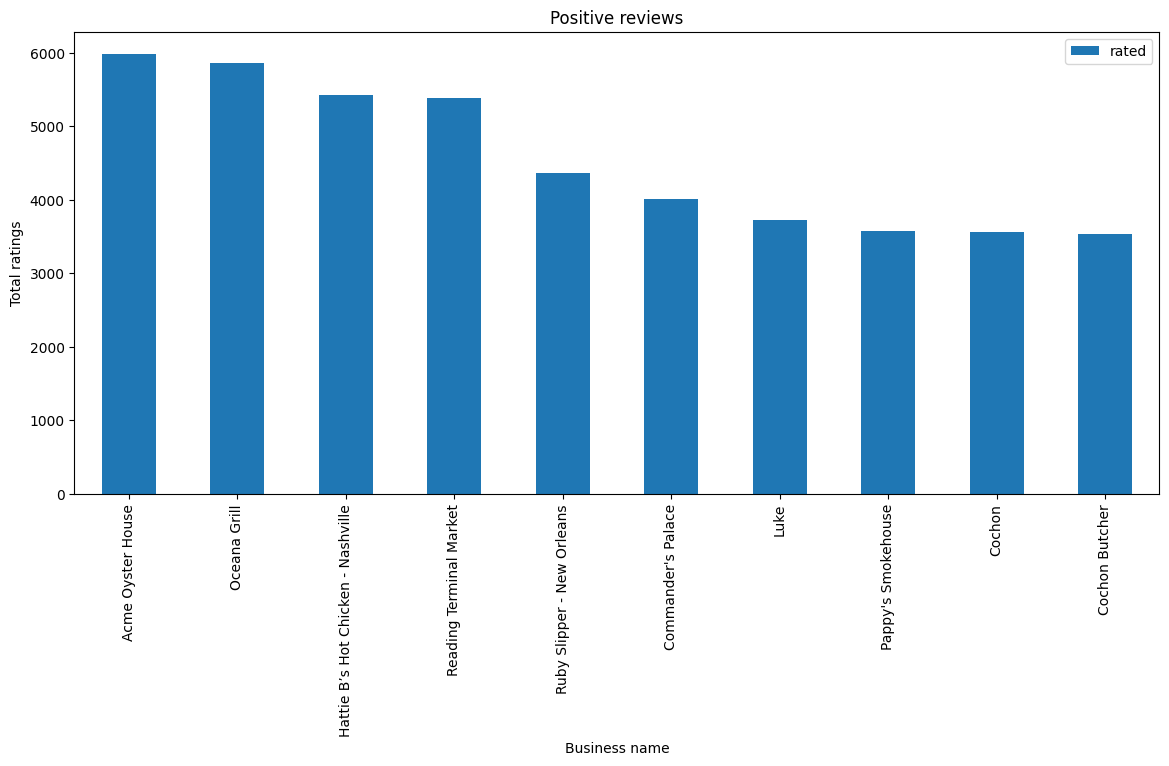

In [13]:
top_count = 10
right = pd.DataFrame(yelp_business[['business_id',"name","categories"]].values,
                    columns = ['business_id',"Business name","categories"])

top_business_data = pd.merge(topbusiness, right = right, how = "inner", on = 'business_id')
top_business_data.sort_values("rated")[::-1][:top_count].plot(x = "Business name",y = "rated", 
                                                   kind = "bar", figsize=(14,6),
                                                   title = 'Positive reviews').set_ylabel("Total ratings")

del(topbusiness)
del(right)

The top 3 businesses in the dataset are Ocean Grill, Acme Oyster House, and Hattie B's Hot Chicken. It's important to note that this finding is specific to the dataset I am working with and may not reflect the actual top businesses in the industry. Additionally, the criteria for determining "top" businesses may vary depending on factors such as ratings, number of reviews, or revenue.

### Locations of top reviewed businesses

In [14]:
# Select the top 300 rated businesses based on the 'rated' column of 'top_business_data'
num_business = 300
business_ids = top_business_data.sort_values("rated")[::-1][:num_business].business_id.values

# Select only the businesses with business IDs in the list of top 300 businesses
useful_b = yelp_business.loc[yelp_business['business_id'].isin(business_ids)]

# Print the number of businesses selected
len(useful_b)

300

### Categories of top reviewed businesses

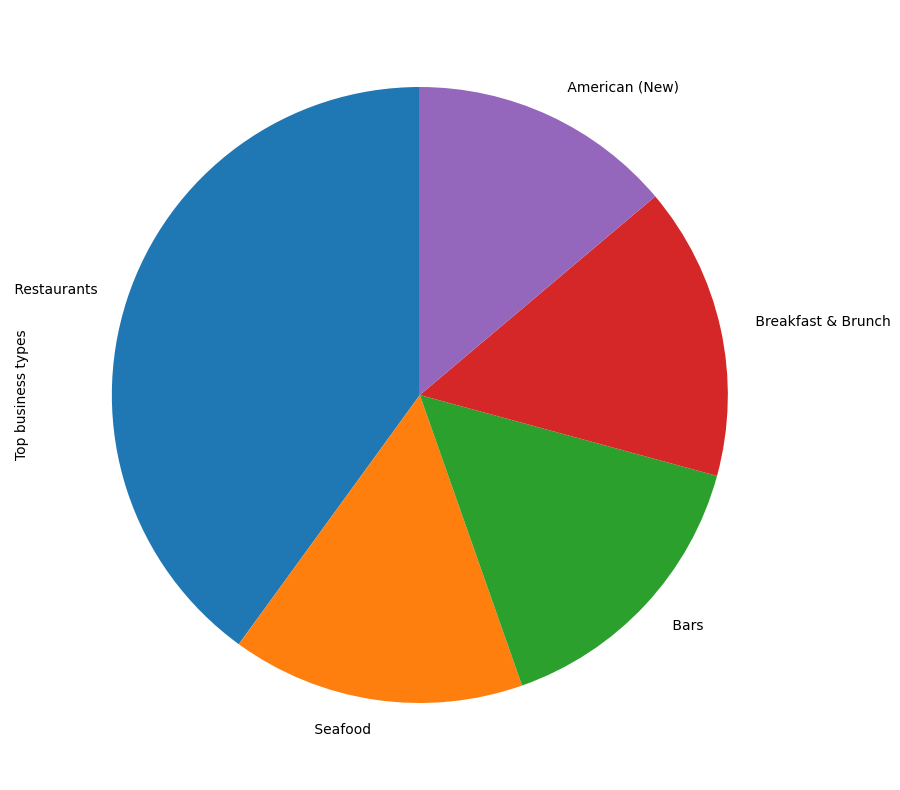

In [15]:
# set the number of categories and top businesses to show
num_cat = 5
top_business = 30

# sort the businesses by rating and select the top ones
cat_data = top_business_data.sort_values("rated")[::-1][:top_business]

# create a dictionary to store the categories and their occurrences
Categories = {}
for cat in cat_data.categories.values:
    all_categories = cat.split(",")
    for x in all_categories:
        try:
            Categories[x] = Categories[x] + 1
        except:
            Categories[x] = 1

# convert the dictionary to a dataframe and reset the index
top_categories = pd.DataFrame.from_dict(data=Categories, orient = "index")
top_categories.reset_index(inplace = True)
top_categories.columns = ['category', 'occurance']

# sort the categories by occurrence and select the top ones
x_val = top_categories.sort_values("occurance")[::-1][:num_cat].occurance.values
labels = top_categories.sort_values("occurance")[::-1][:num_cat].category.values

# create a pie chart to display the top categories
series = pd.Series(x_val, index = labels, name = 'Top business types')
series.plot.pie(figsize = (10, 10), startangle = 90)
plt.show()

### Business categories that need improvement

Businesses that receive negative reviews in certain categories should consider improving their services to attract and retain customers. On the other hand, potential competitors can use this information to identify areas where they could potentially start new businesses nearby.

In [16]:
bottom_reviewed = yelp_review[yelp_review["stars"]<2]
bottom_reviews_dict = {} 

for business_id in bottom_reviewed["business_id"].values:
    try :
        bottom_reviews_dict[business_id] = bottom_reviews_dict[business_id]+1
    except:
        bottom_reviews_dict[business_id] = 1
        
bottombusiness = pd.DataFrame.from_dict(data = bottom_reviews_dict,orient = "index")

bottombusiness.reset_index(inplace = True)
#bottombusiness.head()
bottombusiness.columns = ['business_id', 'rated']

In [17]:
top_count = 20
right = pd.DataFrame(yelp_business[['business_id',"name","categories"]].values,
                    columns = ['business_id',"Business name","categories"])

bottom_business_data = pd.merge(bottombusiness,right=right, how="inner",on = 'business_id')

<Axes: ylabel='Categories'>

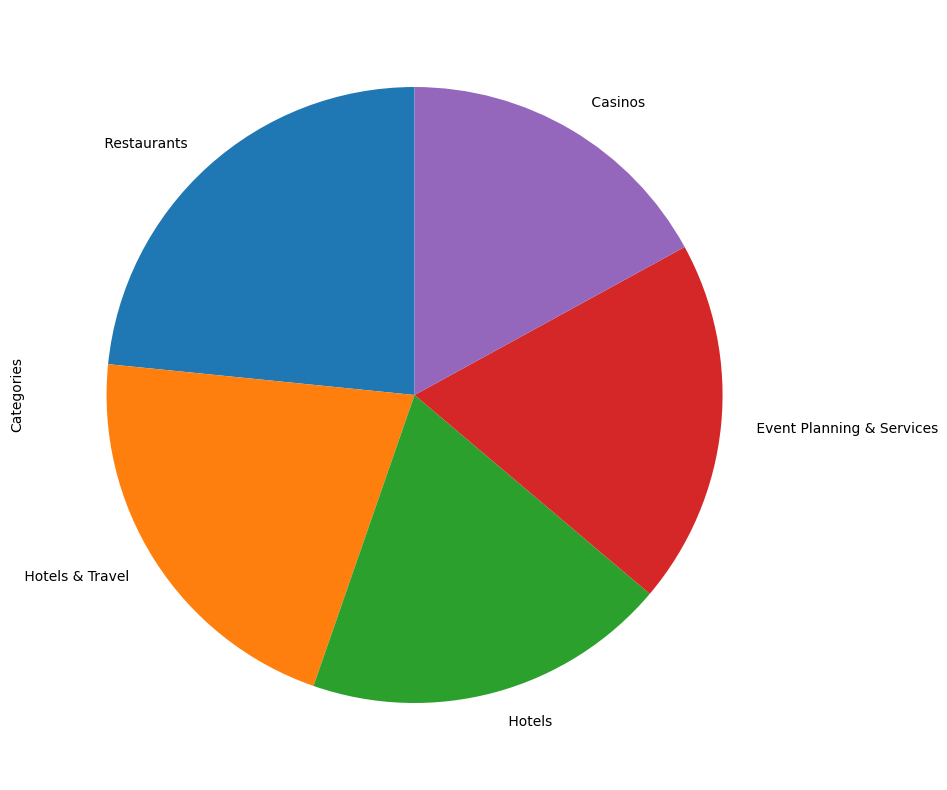

In [18]:
# Set the number of categories to display in the pie chart
num_cat = 5

# Set the number of bottom businesses to consider
bottom_business = 30

# Get the data for the bottom businesses based on the ratings
cat_data = bottom_business_data.sort_values("rated")[::-1][:bottom_business]

# Create an empty dictionary to hold the categories and their occurrence counts
Categories = {}

# Iterate through the categories of each business and count the occurrences of each category
for cat in cat_data.categories.values:
    all_categories = cat.split(",")
    for x in all_categories:
        try :
            Categories[x] = Categories[x] + 1
        except:
            Categories[x] = 1

# Convert the dictionary to a pandas DataFrame
bottom_categories = pd.DataFrame.from_dict(data=Categories, orient="index")
bottom_categories.reset_index(inplace = True)
bottom_categories.columns = ['category', 'occurance']

# Get the values and labels for the top categories to be displayed in the pie chart
x_val = bottom_categories.sort_values("occurance")[::-1][:num_cat].occurance.values
labels = bottom_categories.sort_values("occurance")[::-1][:num_cat].category.values

# Create a pandas Series with the values and labels, and plot a pie chart
series = pd.Series(x_val, index = labels, name = 'Categories')
series.plot.pie(figsize = (10, 10), startangle = 90)